# Vive Pro Eye Evaluation - Linear Model for Vision Correction x HMD

This notebook reproduces the following figures and results from the manuscript: 

- Linear model results for the factors vision correction x HMD, applied to accuracy and SD precision
- Figure 6: LMM results / estimated marginal means

Running this notebook requires the `rpy2` Python package and a working R installation. Model statistics are reported directly in the R output, while estimated marginal means are extracted and plotted in Figure 6. Requires the following R packages: `lme4`, `sjstats`, `pwr`, `emmeans`

In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.stats import linregress

from analysis import * 

FIGTYPES = ['png']


Note: vexptoolbox is not running under Vizard, or Vizard packages could not be imported. Only analysis tools will be available.


In [2]:
# Folders
folder_pkl = '.'
folder_results = '../results'

# Load preprocessed data
(tar, tar_i10, val, pp, sam) = load_pickle_data(folder_pkl)


Data loaded from pickles.


## Linear Model for Accuracy (R)

In [12]:
# Initialize rpy2 extension for Jupyter (enables R code cells)
%load_ext rpy2.ipython

# rpy2 on Windows likes to throw error pop-ups about utf-8 decoding, suppress these here
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.CRITICAL)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [13]:
%%R
print(R.version$version)


[1] "R version 4.0.3 (2020-10-10)"


In [14]:
%%R -i val -o em_acc

library('lme4')
library('emmeans')
library('sjstats')

formula <- acc_nomonoc ~ 1 + vision + hmd + vision:hmd
model_acc <- lm(data=val, formula)

# Model + Anova results
cat('* ANOVA Omnibus Results + Statistics: Accuracy')
print(summary(model_acc))
print(anova_stats(model_acc))

# Post-Hoc Tests
cat('\n\n* Post-Hoc Comparisons: Accuracy')
print(emmeans(model_acc, pairwise ~ vision, adjust="holm")$contrasts)
print(emmeans(model_acc, pairwise ~ hmd, adjust="holm")$contrasts)

# Export estimated marginal means (for Figure 6)
em_acc <- summary(emmeans(model_acc, specs = ~ 'vision * hmd'))


* ANOVA Omnibus Results + Statistics: Accuracy
Call:
lm(formula = formula, data = val)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6581 -0.2124 -0.0324  0.1635  1.8614 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.82634    0.15288   5.405 2.11e-07 ***
visionglasses          0.15041    0.21621   0.696    0.488    
visionuncorrected     -0.27621    0.21621  -1.277    0.203    
hmd                    0.10041    0.09669   1.038    0.301    
visionglasses:hmd      0.17397    0.13674   1.272    0.205    
visionuncorrected:hmd  0.15708    0.13674   1.149    0.252    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3745 on 174 degrees of freedom
Multiple R-squared:  0.2861,	Adjusted R-squared:  0.2655 
F-statistic: 13.94 on 5 and 174 DF,  p-value: 1.847e-11

term       |  df |  sumsq | meansq | statistic | p.value | etasq | partial.etasq | omegasq | partial.omegasq | epsilonsq |

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2192: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  values, tz_parsed = conversion.datetime_to_datetime64(data.ravel("K"))


 contrast               estimate     SE  df t.ratio p.value
 contacts - glasses      -0.4114 0.0684 174 -6.017  <.0001 
 contacts - uncorrected   0.0406 0.0684 174  0.594  0.5536 
 glasses - uncorrected    0.4519 0.0684 174  6.610  <.0001 

Results are averaged over the levels of: hmd 
P value adjustment: holm method for 3 tests 
 contrast estimate     SE  df t.ratio p.value
 1 - 2      -0.211 0.0558 174 -3.775  0.0002 

Results are averaged over the levels of: vision 


## Linear Model for SD Precision (R)

In [15]:
%%R -i val -o em_sd

library('lme4')
library('emmeans')
library('sjstats')

formula <- sd_nomonoc ~ 1 + vision + hmd + vision:hmd
model_sd <- lm(data=val, formula)

# Model + Anova results
cat('* ANOVA Omnibus Results + Statistics: SD Precision')
print(summary(model_sd))
print(anova_stats(model_sd))

# Post-Hoc Tests
cat('\n\n* Post-Hoc Comparisons: SD Precision')
print(emmeans(model_sd, pairwise ~ vision, adjust="holm")$contrasts)
print(emmeans(model_sd, pairwise ~ hmd, adjust="holm")$contrasts)

# Export estimated marginal means (for Figure 6)
em_sd <- summary(emmeans(model_sd, specs = ~ 'vision * hmd'))


* ANOVA Omnibus Results + Statistics: SD Precision
Call:
lm(formula = formula, data = val)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39685 -0.10503 -0.03798  0.02711  1.79243 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)            0.139953   0.116238   1.204   0.2302  
visionglasses          0.397210   0.164385   2.416   0.0167 *
visionuncorrected      0.124806   0.164385   0.759   0.4487  
hmd                    0.062827   0.073515   0.855   0.3939  
visionglasses:hmd     -0.008653   0.103966  -0.083   0.9338  
visionuncorrected:hmd -0.058055   0.103966  -0.558   0.5773  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2847 on 174 degrees of freedom
Multiple R-squared:   0.28,	Adjusted R-squared:  0.2593 
F-statistic: 13.53 on 5 and 174 DF,  p-value: 3.729e-11

term       |  df |  sumsq | meansq | statistic | p.value | etasq | partial.etasq | omegasq | partial.omegasq | epsil

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2192: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  values, tz_parsed = conversion.datetime_to_datetime64(data.ravel("K"))


Results are averaged over the levels of: hmd 
P value adjustment: holm method for 3 tests 
 contrast estimate     SE  df t.ratio p.value
 1 - 2     -0.0406 0.0424 174 -0.956  0.3402 

Results are averaged over the levels of: vision 


In [16]:
# Estimated Marginal Means - Accuracy
round(em_acc, 3)

,vision,hmd,emmean,SE,df,lower.CL,upper.CL
1,contacts,1.0,0.927,0.068,174.0,0.792,1.062
2,glasses,1.0,1.251,0.068,174.0,1.116,1.386
3,uncorrected,1.0,0.808,0.068,174.0,0.673,0.943
4,contacts,2.0,1.027,0.068,174.0,0.892,1.162
5,glasses,2.0,1.525,0.068,174.0,1.391,1.660
6,uncorrected,2.0,1.065,0.068,174.0,0.930,1.200


In [17]:
# Estimated Marginal Means - SD Precision
round(em_sd, 3)

,vision,hmd,emmean,SE,df,lower.CL,upper.CL
1,contacts,1.0,0.203,0.052,174.0,0.100,0.305
2,glasses,1.0,0.591,0.052,174.0,0.489,0.694
3,uncorrected,1.0,0.270,0.052,174.0,0.167,0.372
4,contacts,2.0,0.266,0.052,174.0,0.163,0.368
5,glasses,2.0,0.646,0.052,174.0,0.543,0.748
6,uncorrected,2.0,0.274,0.052,174.0,0.172,0.377


## Figure 6: Linear Model results

In [18]:
# Restructure the R results into the same dict structure used for plot
emmeans_acc = {1: {'mean': [em_acc.loc[(em_acc.vision == 'uncorrected') & (em_acc.hmd == 1), 'emmean'].values[0],
                            em_acc.loc[(em_acc.vision == 'contacts') & (em_acc.hmd == 1), 'emmean'].values[0],
                            em_acc.loc[(em_acc.vision == 'glasses') & (em_acc.hmd == 1), 'emmean'].values[0]], 
                   'sem':  [em_acc.loc[(em_acc.vision == 'uncorrected') & (em_acc.hmd == 1), 'SE'].values[0],
                            em_acc.loc[(em_acc.vision == 'contacts') & (em_acc.hmd == 1), 'SE'].values[0],
                            em_acc.loc[(em_acc.vision == 'glasses') & (em_acc.hmd == 1), 'SE'].values[0]]},
               2: {'mean': [em_acc.loc[(em_acc.vision == 'uncorrected') & (em_acc.hmd == 2), 'emmean'].values[0],
                            em_acc.loc[(em_acc.vision == 'contacts') & (em_acc.hmd == 2), 'emmean'].values[0],
                            em_acc.loc[(em_acc.vision == 'glasses') & (em_acc.hmd == 2), 'emmean'].values[0]], 
                   'sem':  [em_acc.loc[(em_acc.vision == 'uncorrected') & (em_acc.hmd == 2), 'SE'].values[0],
                            em_acc.loc[(em_acc.vision == 'contacts') & (em_acc.hmd == 2), 'SE'].values[0],
                            em_acc.loc[(em_acc.vision == 'glasses') & (em_acc.hmd == 2), 'SE'].values[0]]} }

emmeans_std = {1: {'mean': [em_sd.loc[(em_sd.vision == 'uncorrected') & (em_sd.hmd == 1), 'emmean'].values[0],
                            em_sd.loc[(em_sd.vision == 'contacts') & (em_sd.hmd == 1), 'emmean'].values[0],
                            em_sd.loc[(em_sd.vision == 'glasses') & (em_sd.hmd == 1), 'emmean'].values[0]], 
                   'sem':  [em_sd.loc[(em_sd.vision == 'uncorrected') & (em_sd.hmd == 1), 'SE'].values[0],
                            em_sd.loc[(em_sd.vision == 'contacts') & (em_sd.hmd == 1), 'SE'].values[0],
                            em_sd.loc[(em_sd.vision == 'glasses') & (em_sd.hmd == 1), 'SE'].values[0]]},
               2: {'mean': [em_sd.loc[(em_sd.vision == 'uncorrected') & (em_sd.hmd == 2), 'emmean'].values[0],
                            em_sd.loc[(em_sd.vision == 'contacts') & (em_sd.hmd == 2), 'emmean'].values[0],
                            em_sd.loc[(em_sd.vision == 'glasses') & (em_sd.hmd == 2), 'emmean'].values[0]], 
                   'sem':  [em_sd.loc[(em_sd.vision == 'uncorrected') & (em_sd.hmd == 2), 'SE'].values[0],
                            em_sd.loc[(em_sd.vision == 'contacts') & (em_sd.hmd == 2), 'SE'].values[0],
                            em_sd.loc[(em_sd.vision == 'glasses') & (em_sd.hmd == 2), 'SE'].values[0]]} }

In [19]:
def lmm_accuracy_figure(data, figsize=(3.25, 3.2), dodge=0.075):
    
    VISION = ['No Correction', 'Contacts', 'Glasses']
    LABEL_SIZE = 10
    TICK_SIZE = 8
    MARKER_SIZE = 5
    ERRBAR_WIDTH = 1.2
    LINE_WIDTH = 0.8
    HMD_COLORS = [Set1_9.mpl_colors[1], Set1_9.mpl_colors[4]]
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=150)

    handles = []
    labels = []
    for hmd in data[0].keys():
        xs = []
        ys_acc = []
        ys_std = []
        for vx, vision in enumerate(VISION):
            c = HMD_COLORS[hmd-1]
            if hmd == 1:
                x = vx - dodge + 1
            else:
                x = vx + dodge + 1
            
            # Accuracy
            h1 = ax.errorbar(x, 
                             data[0][hmd]['mean'][vx], 
                             yerr=data[0][hmd]['sem'][vx], 
                             marker='o', 
                             color=c, 
                             linewidth=LINE_WIDTH, 
                             ms=MARKER_SIZE, 
                             zorder=3, 
                             label='HMD{:d}'.format(hmd))
            ys_acc.append(data[0][hmd]['mean'][vx])
            
            # SD
            h2 = ax.errorbar(x, 
                             data[1][hmd]['mean'][vx], 
                             yerr=data[1][hmd]['sem'][vx], 
                             marker='o', 
                             color=c, 
                             markerfacecolor='w', 
                             linewidth=LINE_WIDTH, 
                             ms=MARKER_SIZE, 
                             zorder=3, 
                             label='HMD{:d}'.format(hmd))
            ys_std.append(data[1][hmd]['mean'][vx])
            xs.append(x)
            
            if vx == 0:
                handles.append(h1)
                labels.append('HMD{:d}'.format(hmd))
                            
        ax.plot(xs, ys_acc, '-', color=c, linewidth=LINE_WIDTH, zorder=2)
        ax.plot(xs, ys_std, ':', color=c, linewidth=LINE_WIDTH, zorder=2)

    ax.set_xlim([0.5, 3.5])
    ax.set_xticks(np.arange(1, len(VISION) + 1))
    ax.set_xticklabels(VISION, fontsize=TICK_SIZE)
    
    ax.set_xlabel('Vision Correction', fontsize=LABEL_SIZE) 
    ax.set_ylabel('Estimated Marginal Means (°)', fontsize=LABEL_SIZE)
    ax.set_ylim([0, 2])
    ax.set_yticks(np.arange(0, 2.5, 0.5))
    ax.tick_params(labelsize=TICK_SIZE, width=1.0, length=4, direction='in')
    
    # Combined Legend
    measures = [plt.Line2D([0], [0], color='k', marker='o', ls='-', linewidth=LINE_WIDTH, ms=MARKER_SIZE, label='Accuracy (Gaze Error)'),
                plt.Line2D([0], [0], color='k', marker='o', ls=':', markerfacecolor='w', linewidth=LINE_WIDTH, ms=MARKER_SIZE, label='Precision (SD)')]
    measures.extend(handles)
    leg = ax.legend(handles=measures,
                    loc='upper left', 
                    fontsize=7, 
                    facecolor='w', 
                    frameon=True, 
                    framealpha=0,
                    edgecolor='w', 
                    fancybox=False, 
                    title_fontsize=TICK_SIZE)

    # Open axes
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.2)
        ax.spines[axis].set_color('k')
    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0)

    plt.tight_layout()


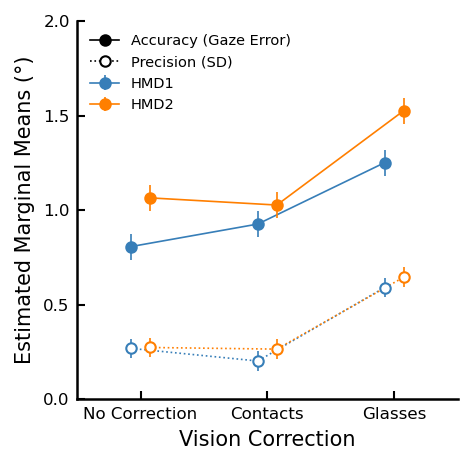

In [20]:
# Figure 6: Estimated Marginal Means
lmm_accuracy_figure([emmeans_acc, emmeans_std])
for fmt in FIGTYPES:
    plt.savefig(os.path.join(folder_results, 'figure6.{:s}'.format(fmt)), bbox_inches='tight', dpi=300)
